In [136]:
import pandas as pd
import glob

# Đọc từng file CSV vào DataFrame và lưu vào một list
dfs = []
for i in range(1, 13):
    filename = f'sales2019_{i}.csv'
    print(f"Processing file: {filename}")
    df = pd.read_csv(filename)
    dfs.append(df)
    

# Gộp các DataFrame từ list lại với nhau
df_combined = pd.concat(dfs, ignore_index=True)

# Lưu kết quả vào một tệp CSV mới
df_combined.to_csv('Sales.csv', index=False)

Processing file: sales2019_1.csv
Processing file: sales2019_2.csv
Processing file: sales2019_3.csv
Processing file: sales2019_4.csv
Processing file: sales2019_5.csv
Processing file: sales2019_6.csv
Processing file: sales2019_7.csv
Processing file: sales2019_8.csv
Processing file: sales2019_9.csv
Processing file: sales2019_10.csv
Processing file: sales2019_11.csv
Processing file: sales2019_12.csv


In [142]:
import pandas as pd
import os
import matplotlib.pyplot as plt
df = pd.read_csv('Sales.csv')

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [ ]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [144]:
def normalize_product_name(product_name):
    # Chuyển đổi tất cả thành chữ thường
    product_name = product_name.lower()
    # Xử lý khoảng trắng
    product_name = product_name.strip()
    
    return product_name
# Áp dụng hàm chuẩn hóa lên cột 'Product'
df['Product'] = df['Product'].astype(str)
df['Product'] = df['Product'].apply(normalize_product_name)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iphone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,lightning charging cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,wired headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in fhd monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,wired headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,lightning charging cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,aa batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,vareebadd phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,wired headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


question:tháng nào có doanh thu cao nhất, doanh thu đó là bao nhiêu

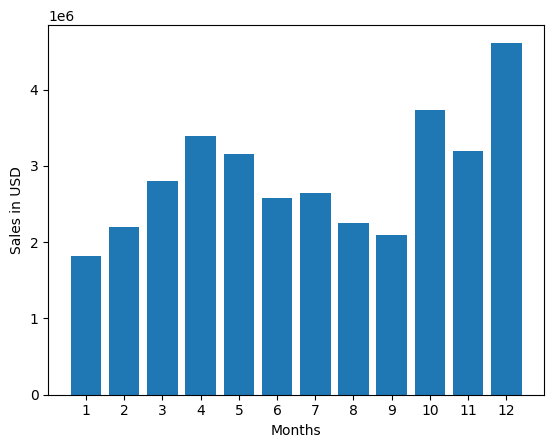

4613443.5


In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.groupby('Month').sum()['Sales']
sales_value = df.groupby('Month').sum()['Sales']
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()
print(sales_value.max())

tháng 12 có doanh số bán cao nhất là 4613443.5

Tại sao tháng 12 lại có doanh thu cao nhất ?
-tháng 12 có 2 dịp lễ lớn giáng sinh và năm mới nên mọi người thường mua sớm nhiều hơn
-các sản phẩm được giảm giá vào các dịp này

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\118422678.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df_december, palette='viridis')


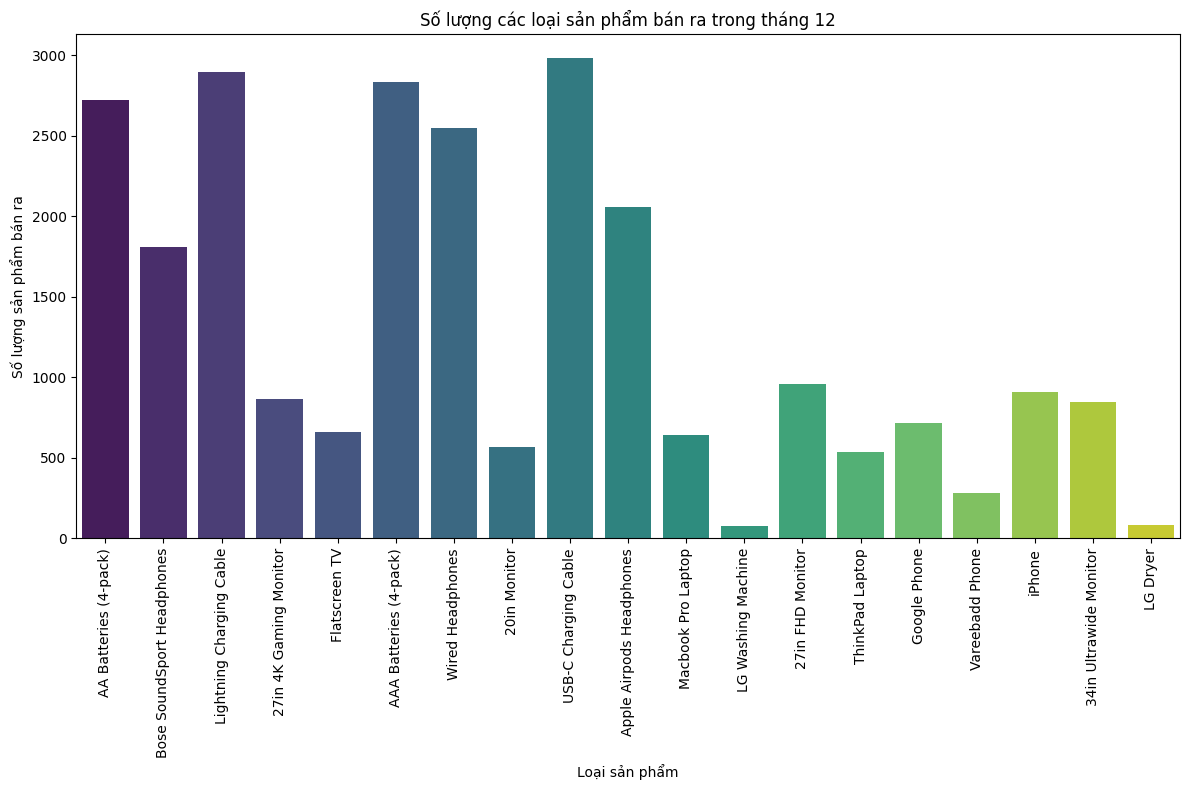

In [ ]:
import seaborn as sns
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Lọc ra các đơn hàng trong tháng 12
df_december = df[df['Month']== '12']

# Biểu đồ hóa số lượng các loại sản phẩm bán ra trong tháng 12
plt.figure(figsize=(12, 8))
sns.countplot(x='Product', data=df_december, palette='viridis')
plt.title('Số lượng các loại sản phẩm bán ra trong tháng 12')
plt.xticks(rotation=90)
plt.xlabel('Loại sản phẩm')
plt.ylabel('Số lượng sản phẩm bán ra')
plt.tight_layout()
plt.show()

question: thành phố nào có doanh thu cao nhất?

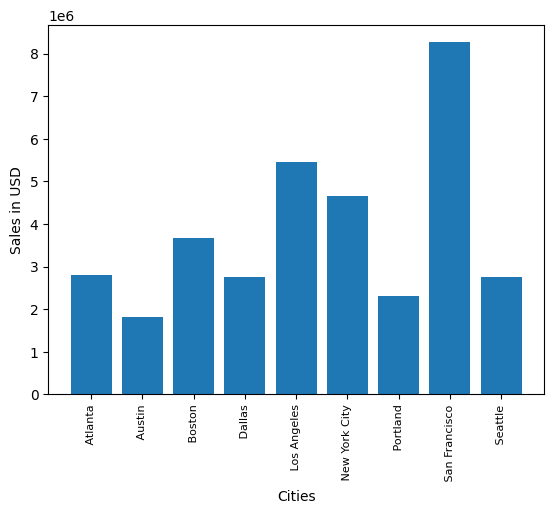

In [ ]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df.groupby('City')['Sales'].sum()
sales_value_city = df.groupby('City')['Sales'].sum()
cities = [city for city, sales in sales_value_city.items()]
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

-San Francisco là thành phố nơi có doanh số cao nhất
Tại sao thành phố San Francisco lại có doanh số cao ?

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\1824416638.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df_san_francisco, palette='viridis')


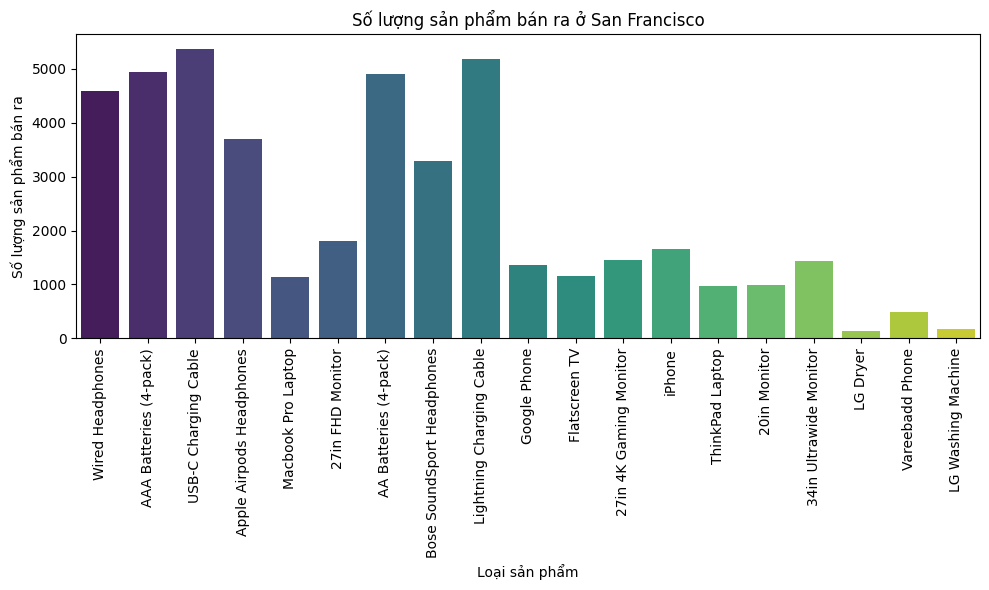

In [ ]:
# Trích xuất thông tin thành phố từ địa chỉ mua hàng
#df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

# Biểu đồ hóa số lượng sản phẩm bán ra ở thành phố San Francisco
df_san_francisco = df[df['City'].str.strip() == 'San Francisco']  # Lọc các hàng có thành phố là San Francisco

plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=df_san_francisco, palette='viridis')
plt.title('Số lượng sản phẩm bán ra ở San Francisco')
plt.xticks(rotation=90)
plt.xlabel('Loại sản phẩm')
plt.ylabel('Số lượng sản phẩm bán ra')
plt.tight_layout()
plt.show()


Question:Sản phẩm nào bán được nhiều nhất? Tại sao bạn nghĩ nó được bán nhiều nhất?

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\2455427267.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


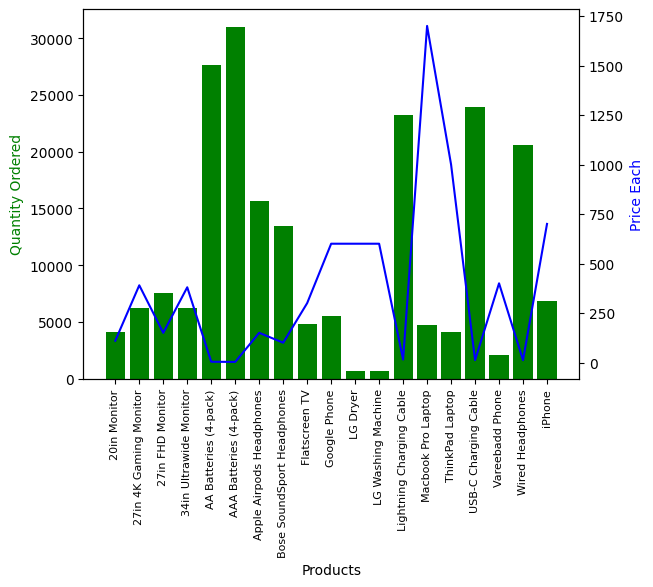

In [ ]:
all_products = df.groupby('Product')['Quantity Ordered'].sum()
prices = df.groupby('Product')['Price Each'].mean()
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

2 sản phẩm được bán nhiều nhất AAA Batteries (4-pack) và AA Batteries (4-pack)
-do có giá thành rẻ hơn hai sản phẩm này được mua nhiều nhất

question:khung giờ nào có lượng đặt đơn hàng lớn, giờ nào có thể đặt quảng cáo để thúc đẩy doanh thu hiệu quả nhất

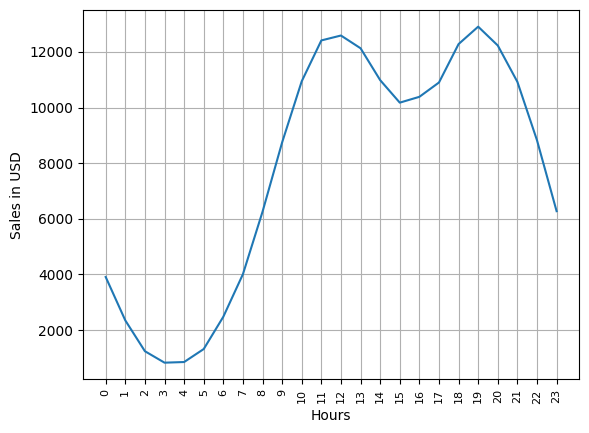

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

khung h 11-12h và 18-20h là khung có lượng mua hàng lớn
có thể đặt quảng cáo cáo vào khung h này đê thúc đẩy lượng đơn hành
- tại sao khung h này lại có đơn đặt hàng lớn?
+ tại vì đây là những khung h nghỉ trưa và nghỉ tối nên lượng người đặt hàng sẽ cao hơn

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int8          
 3   Price Each        185950 non-null  float32       
 4   Sales             185950 non-null  float32       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  object        
 8   City              185950 non-null  object        
 9   Hours             185950 non-null  int32         
dtypes: datetime64[ns](1), float32(2), int32(1), int8(1), object(5)
memory usage: 12.2+ MB


C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\1946417920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df_san_francisco, palette='viridis')


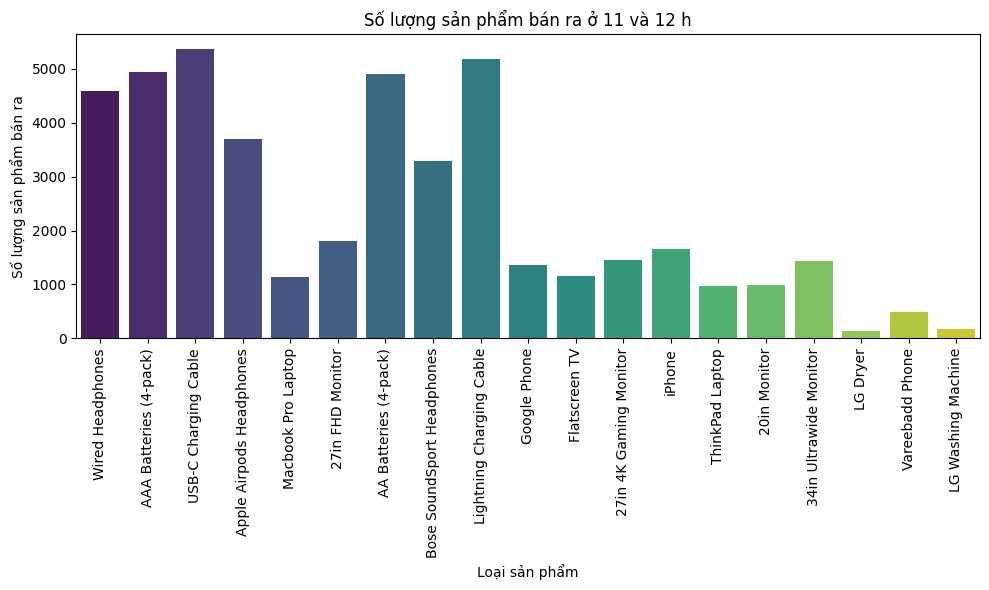

In [ ]:
df_h = df[(df['Hours']== 12) | (df['Hours']==11) ] 

plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=df_san_francisco, palette='viridis')
plt.title('Số lượng sản phẩm bán ra ở 11 và 12 h')
plt.xticks(rotation=90)
plt.xlabel('Loại sản phẩm')
plt.ylabel('Số lượng sản phẩm bán ra')
plt.tight_layout()
plt.show()

question: những mặt hàng nào thường được đặt cùng với nhau?

In [ ]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\427715042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


All Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

Ta có 4 loại này có lượng đặt hàng cùng nhau cao nhất 
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
-Dựa vào số liệu này chúng ta có thể tạo ra những combo đồ để thúc đẩy doanh số 